# Спарк сессия

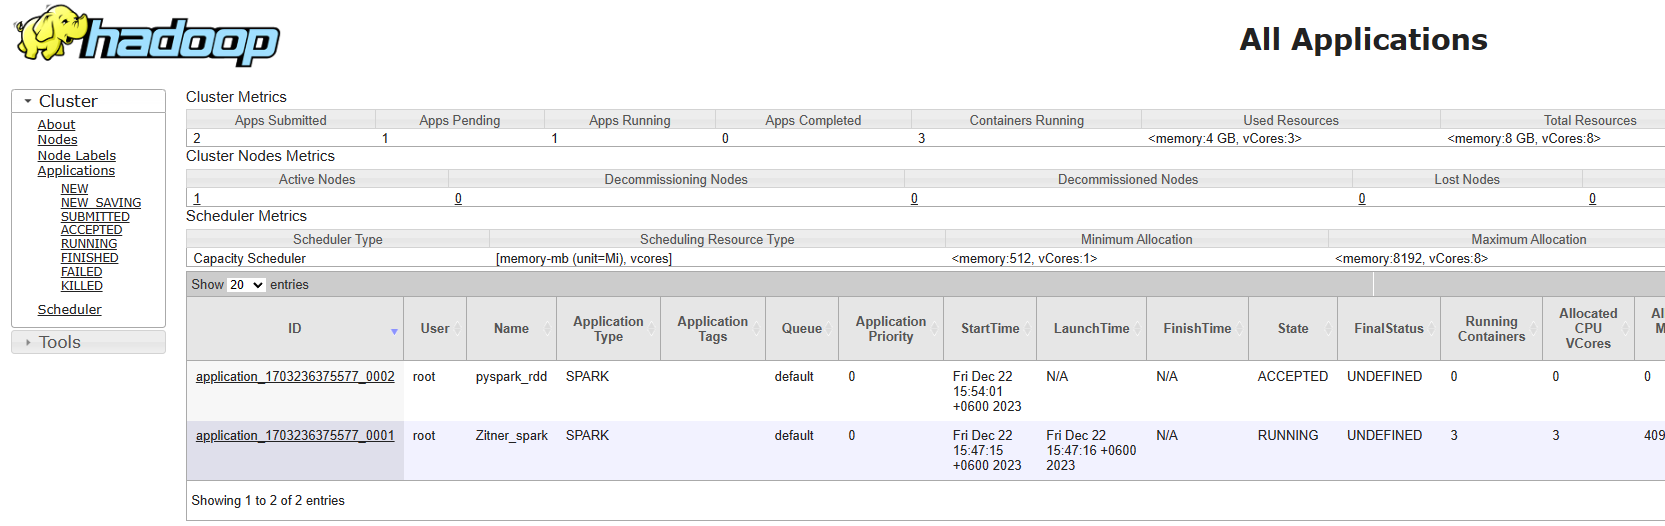

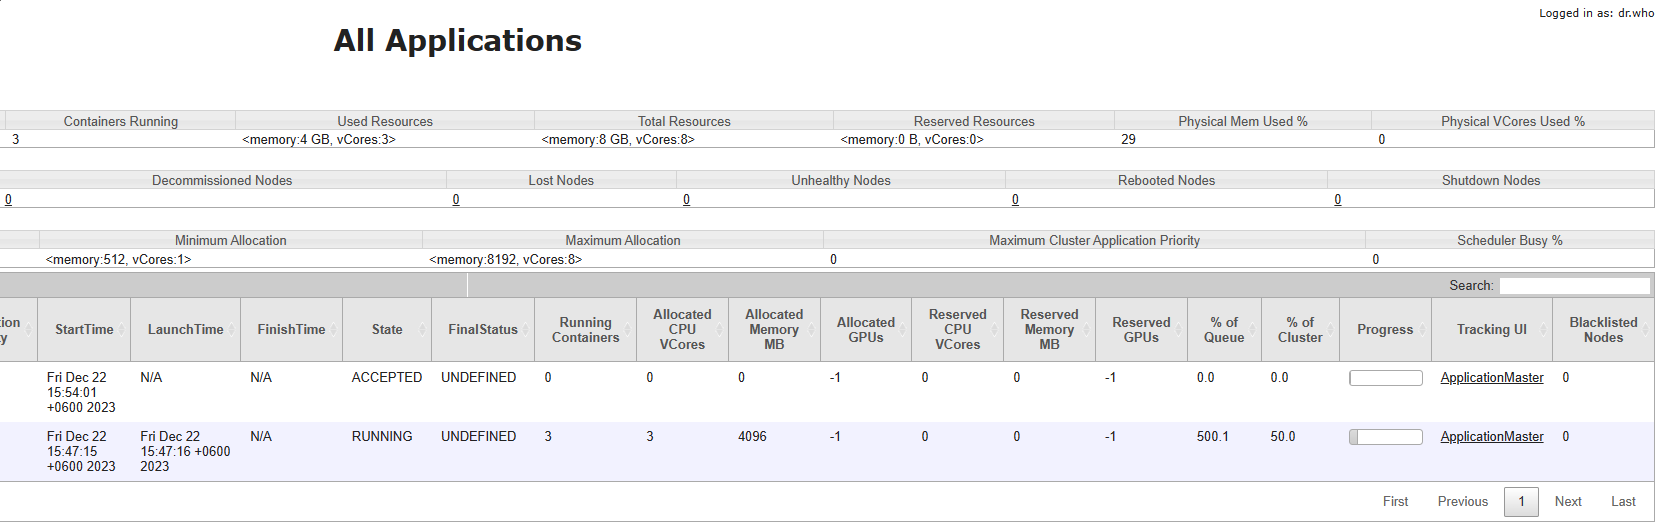

## HW 2. Block 1

In [1]:
import pyspark

In [2]:
from pyspark import SparkContext, SparkConf

In [3]:
!hdfs dfsadmin -safemode leave

Safe mode is OFF


In [4]:
conf = SparkConf().set("spark.executor.instances", "2").set("spark.executor.cores", "1").set("spark.executor.memory", "1g")

In [5]:
sc = SparkContext(appName="Zitner_spark", master="yarn")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/22 12:47:13 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


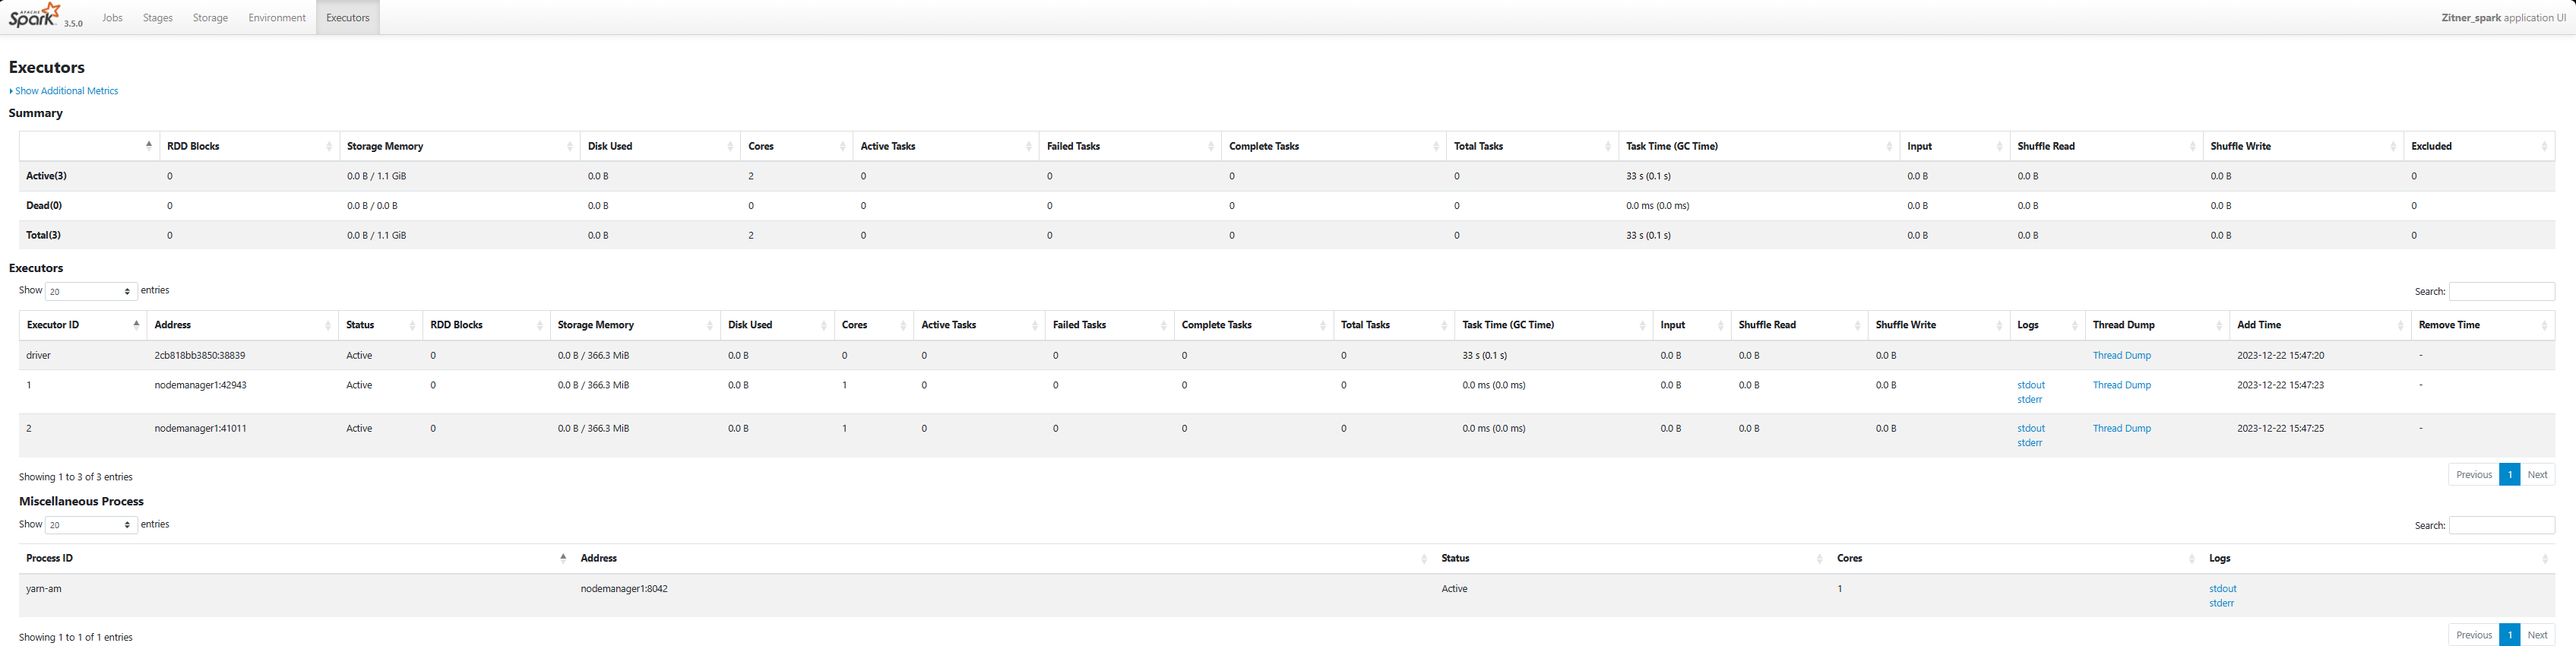

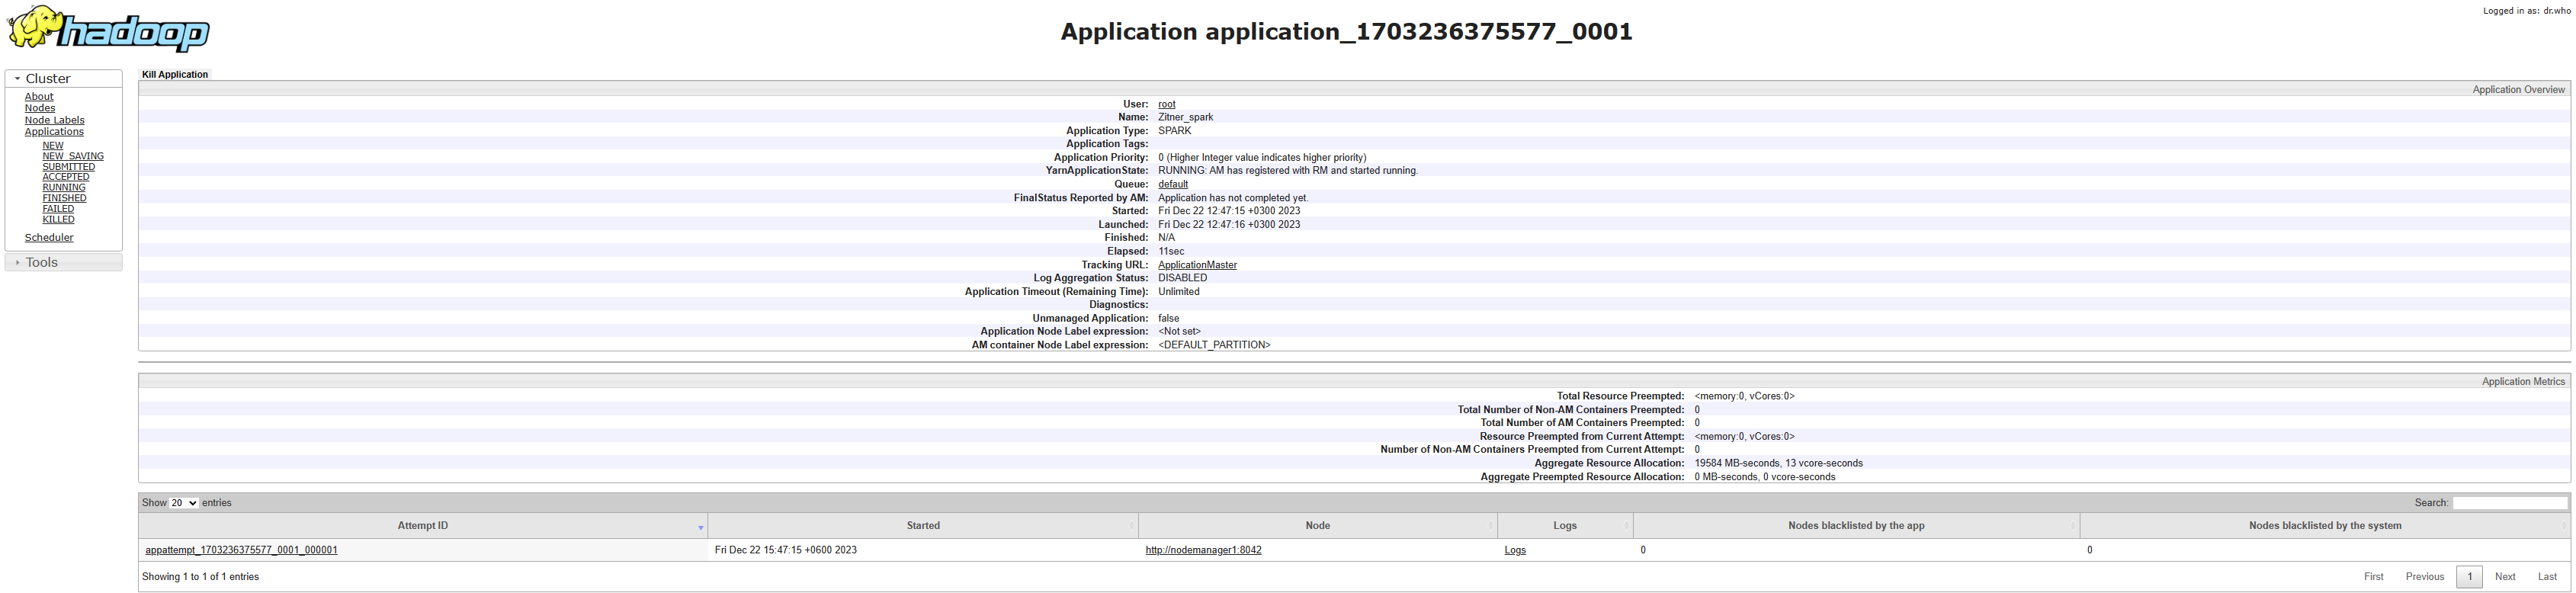

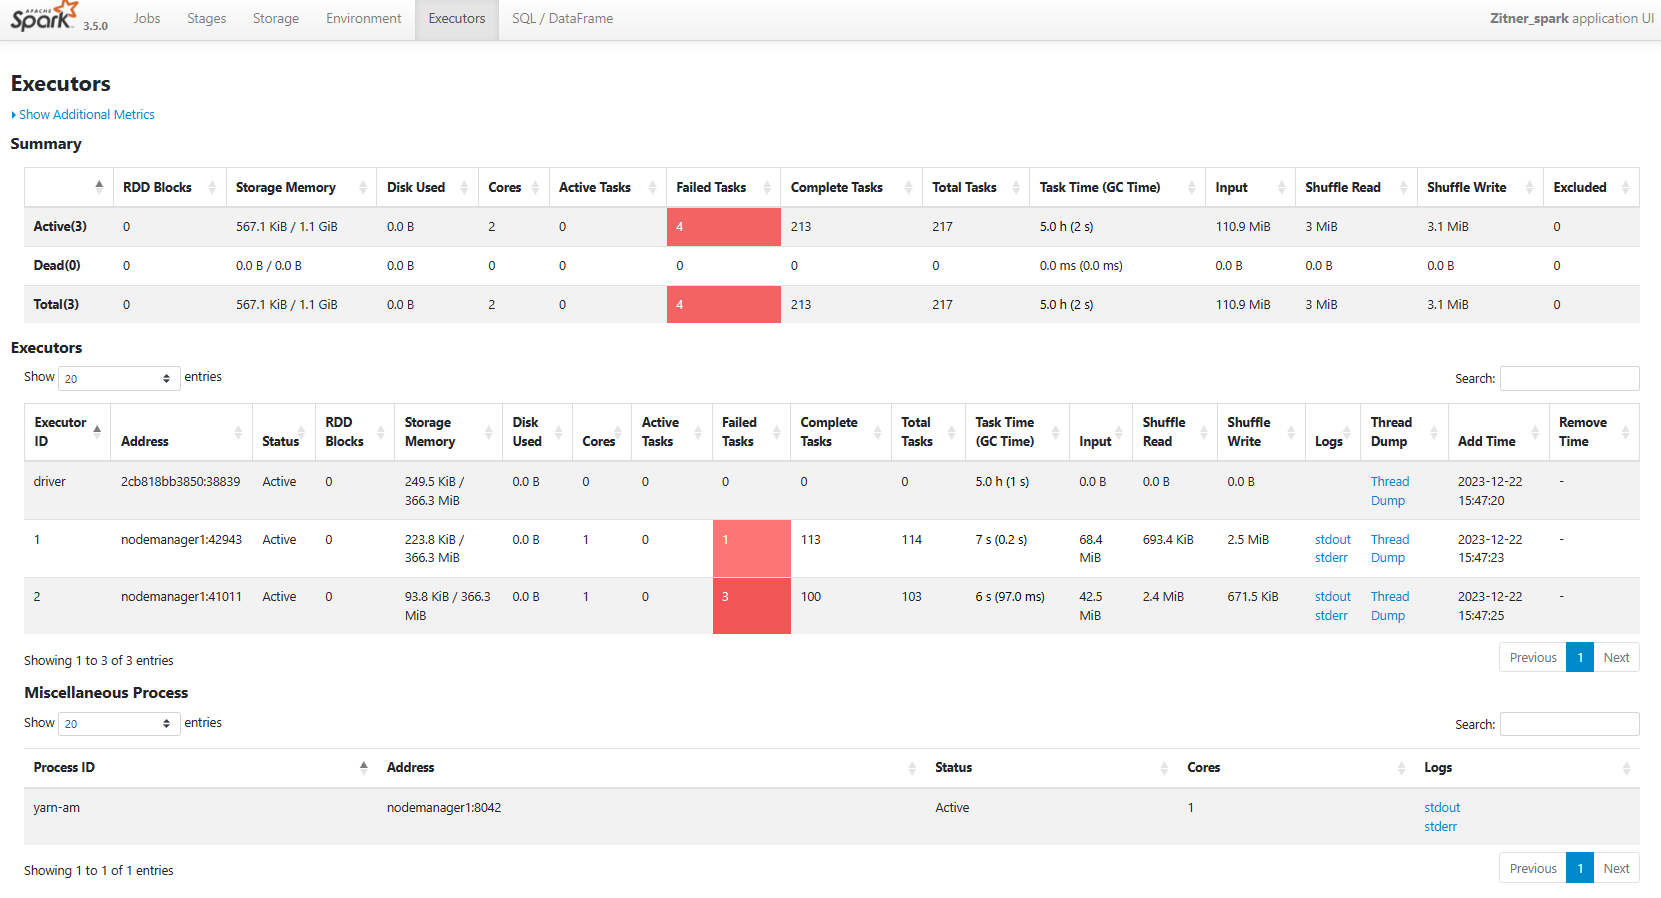

In [6]:
import numpy as np

In [16]:
vocabulary = ["Apache", "Spark", "Hadoop"]
numbers = np.random.randint(10, size=10000)
words = np.random.choice(vocabulary, size=10000)
collection = zip(numbers, words)

In [17]:
rdd = sc.parallelize(collection)

In [18]:
rdd

ParallelCollectionRDD[4] at readRDDFromFile at PythonRDD.scala:289

In [19]:
rdd.count()

10000

In [20]:
rdd.take(5)

[(3, 'Spark'), (9, 'Spark'), (1, 'Hadoop'), (1, 'Hadoop'), (1, 'Spark')]

In [23]:
sc.parallelize(range(10)).glom().collect()

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

In [24]:
rdd.getNumPartitions()

2

In [25]:
!hdfs dfs -put ml-latest-small

In [30]:
rdd_ratings = sc.textFile("ml-latest-small/ratings.csv")

In [31]:
rdd_ratings.take(10)

['userId,movieId,rating,timestamp',
 '1,1,4.0,964982703',
 '1,3,4.0,964981247',
 '1,6,4.0,964982224',
 '1,47,5.0,964983815',
 '1,50,5.0,964982931',
 '1,70,3.0,964982400',
 '1,101,5.0,964980868',
 '1,110,4.0,964982176',
 '1,151,5.0,964984041']

In [37]:
rdd_ratings.count()

100837

### 1 Стейдж, 2 таска

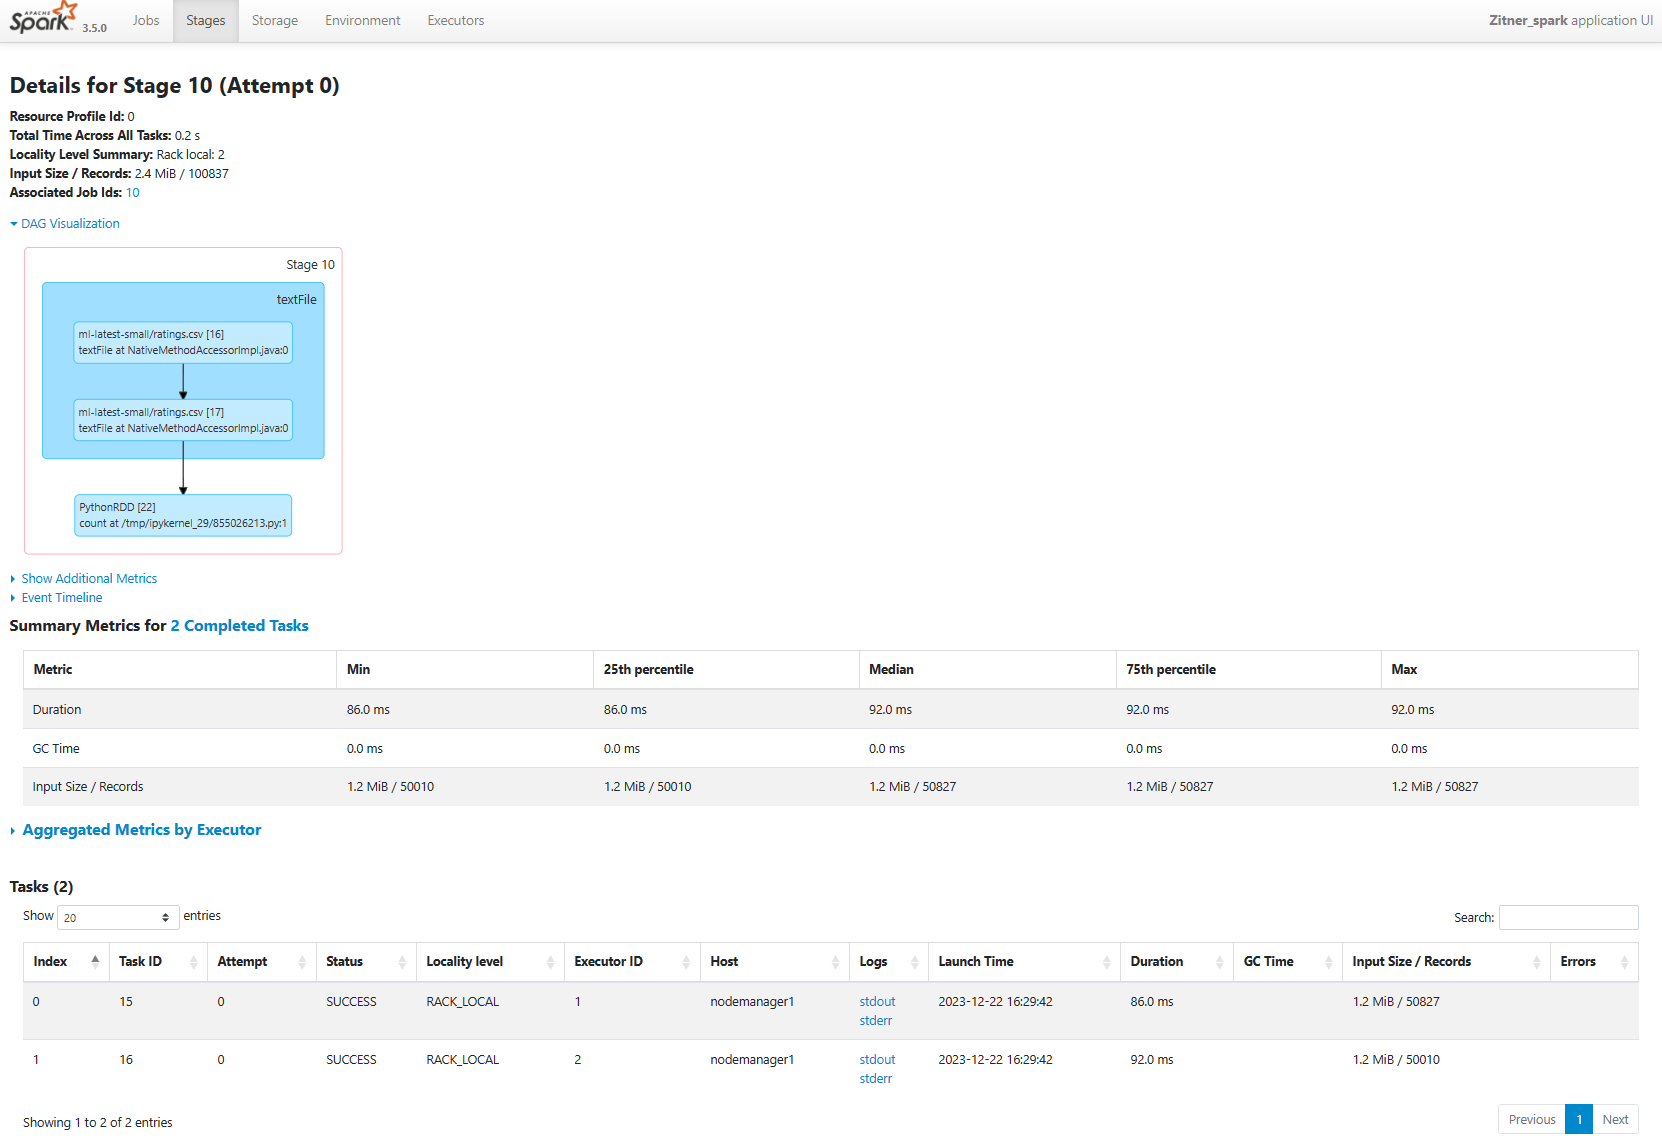

In [38]:
rdd_tags = sc.textFile("ml-latest-small/tags.csv")

In [32]:
rdd_tags.take(10)

['userId,movieId,tag,timestamp',
 '2,60756,funny,1445714994',
 '2,60756,Highly quotable,1445714996',
 '2,60756,will ferrell,1445714992',
 '2,89774,Boxing story,1445715207',
 '2,89774,MMA,1445715200',
 '2,89774,Tom Hardy,1445715205',
 '2,106782,drugs,1445715054',
 '2,106782,Leonardo DiCaprio,1445715051',
 '2,106782,Martin Scorsese,1445715056']

In [39]:
rdd_tags.count()

3684

### 1 Стейдж, 2 таска

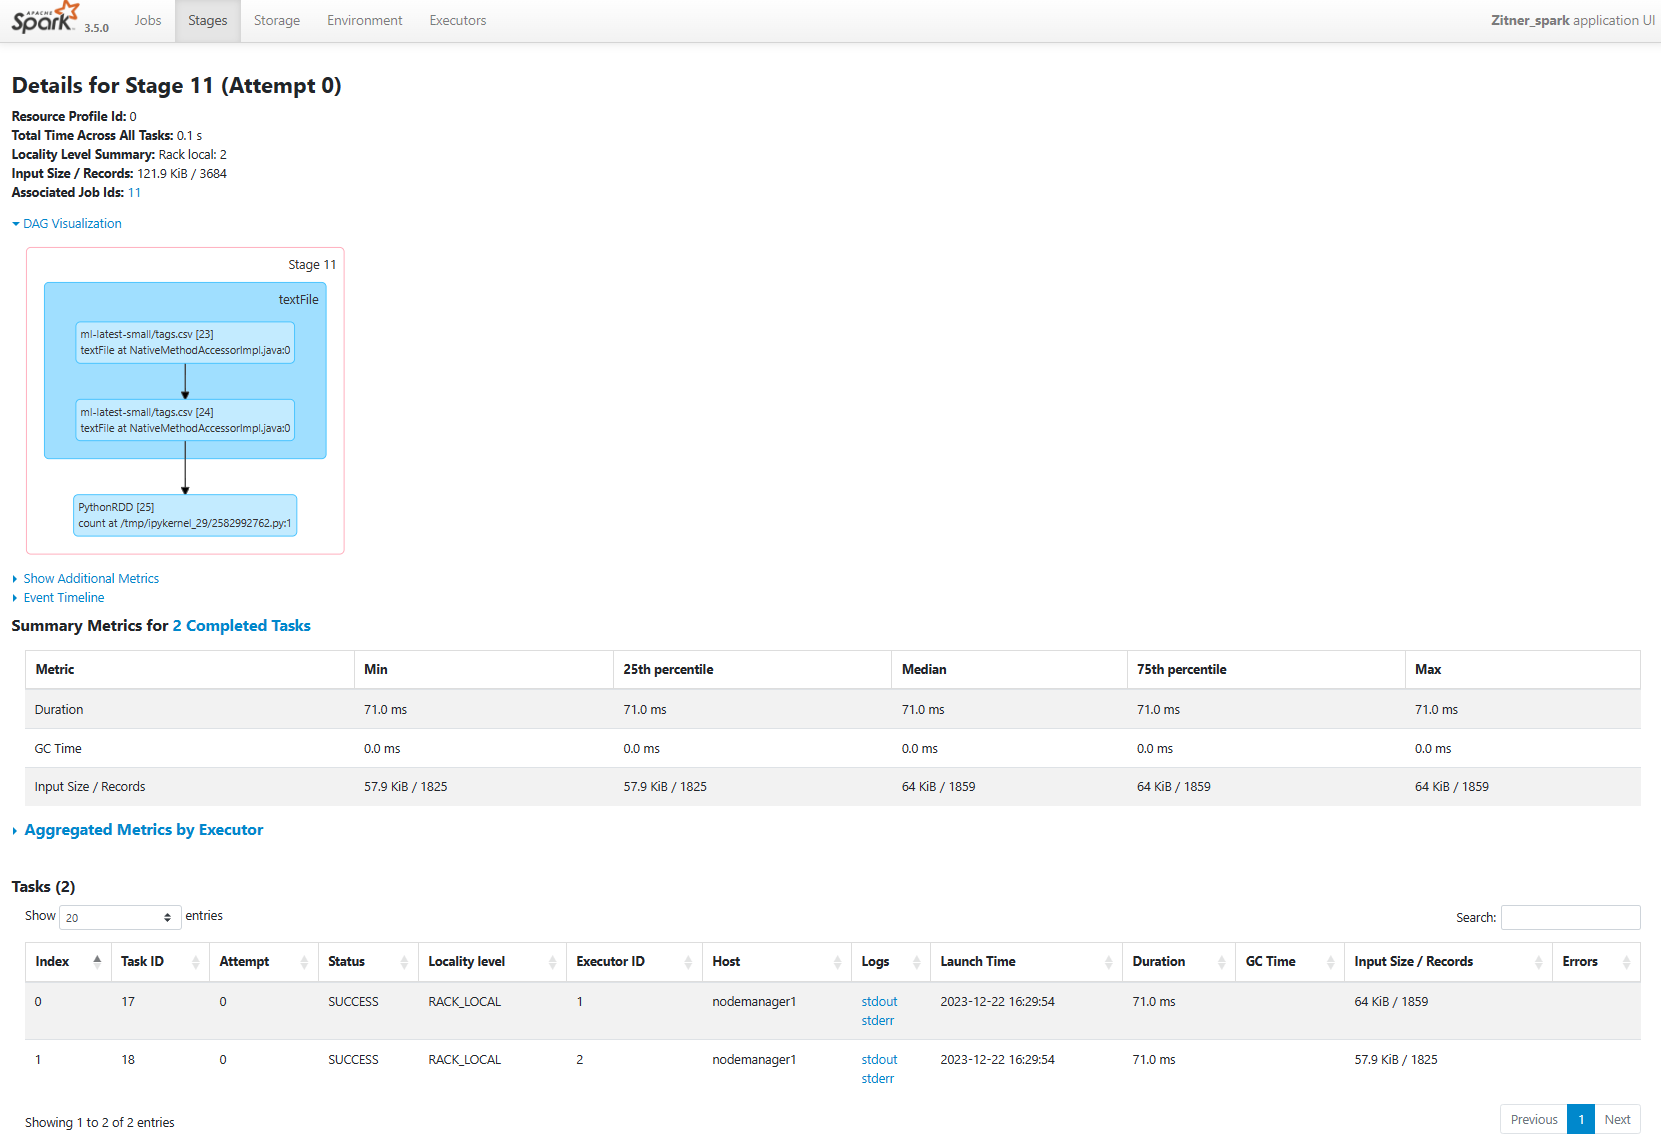

## HW 2. Block 2

### Подсчет кол-ва уникальных фильмов

In [43]:
rdd_ratings.take(10)

['userId,movieId,rating,timestamp',
 '1,1,4.0,964982703',
 '1,3,4.0,964981247',
 '1,6,4.0,964982224',
 '1,47,5.0,964983815',
 '1,50,5.0,964982931',
 '1,70,3.0,964982400',
 '1,101,5.0,964980868',
 '1,110,4.0,964982176',
 '1,151,5.0,964984041']

In [46]:
ratings_cont = rdd_ratings.filter(lambda x: "userId" not in x)
ratings_cont.take(5)

['1,1,4.0,964982703',
 '1,3,4.0,964981247',
 '1,6,4.0,964982224',
 '1,47,5.0,964983815',
 '1,50,5.0,964982931']

In [47]:
ratings_split = ratings_cont.map(lambda x: x.split(","))
ratings_split.take (5)

[['1', '1', '4.0', '964982703'],
 ['1', '3', '4.0', '964981247'],
 ['1', '6', '4.0', '964982224'],
 ['1', '47', '5.0', '964983815'],
 ['1', '50', '5.0', '964982931']]

In [52]:
movie = ratings_split.map(lambda x: x[1])
movie.take (10)

['1', '3', '6', '47', '50', '70', '101', '110', '151', '157']

In [59]:
movie.map(lambda x: (x, 1)).countByKey()

defaultdict(int,
            {'1': 215,
             '3': 52,
             '6': 102,
             '47': 203,
             '50': 204,
             '70': 55,
             '101': 23,
             '110': 237,
             '151': 44,
             '157': 11,
             '163': 66,
             '216': 49,
             '223': 104,
             '231': 133,
             '235': 70,
             '260': 251,
             '296': 307,
             '316': 140,
             '333': 50,
             '349': 110,
             '356': 329,
             '362': 34,
             '367': 157,
             '423': 10,
             '441': 42,
             '457': 190,
             '480': 238,
             '500': 144,
             '527': 220,
             '543': 41,
             '552': 61,
             '553': 65,
             '590': 164,
             '592': 189,
             '593': 279,
             '596': 60,
             '608': 181,
             '648': 162,
             '661': 49,
             '673': 53,
          

### Подсчет кол-ва уникальных юзеров

In [57]:
user = ratings_split.map(lambda x: x[0])
user.take(10)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [58]:
user.map(lambda x: (x, 1)).countByKey()

defaultdict(int,
            {'1': 232,
             '2': 29,
             '3': 39,
             '4': 216,
             '5': 44,
             '6': 314,
             '7': 152,
             '8': 47,
             '9': 46,
             '10': 140,
             '11': 64,
             '12': 32,
             '13': 31,
             '14': 48,
             '15': 135,
             '16': 98,
             '17': 105,
             '18': 502,
             '19': 703,
             '20': 242,
             '21': 443,
             '22': 119,
             '23': 121,
             '24': 110,
             '25': 26,
             '26': 21,
             '27': 135,
             '28': 570,
             '29': 81,
             '30': 34,
             '31': 50,
             '32': 102,
             '33': 156,
             '34': 86,
             '35': 23,
             '36': 60,
             '37': 21,
             '38': 78,
             '39': 100,
             '40': 103,
             '41': 217,
             '42': 440,
    

### Оценки >= 4.00

In [66]:
score = ratings_split.map(lambda x: x[2])
score.take (10)

['4.0', '4.0', '4.0', '5.0', '5.0', '3.0', '5.0', '4.0', '5.0', '5.0']

In [69]:
score_fl = score.map(lambda x: float(x))
score_fl.take(10)

[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0]

In [70]:
score_posi = score_fl.filter(lambda x: x >= 4.0)
score_posi.take(10)

[4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0]

In [71]:
score_posi.map(lambda x: (x, 1)).countByKey()

defaultdict(int, {4.0: 26818, 5.0: 13211, 4.5: 8551})

### Топ 100 фильмов с самым высоким рейтингом

In [271]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as f

In [272]:
spark = SparkSession.builder.master("yarn").appName("Zitner_average").getOrCreate()

In [273]:
spark

In [274]:
%%time
ratings_df = spark.read.format("csv").option("header", "True").load("ml-latest-small/ratings.csv")

CPU times: user 984 µs, sys: 457 µs, total: 1.44 ms
Wall time: 109 ms


In [275]:
ratings_df.show(5)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows



In [276]:
ratings_schema = StructType(fields=[
    StructField("userId", IntegerType()),
    StructField("movieId", IntegerType()),
    StructField("rating", DoubleType()),
    StructField("timestamp", LongType()),
])

In [277]:
%%time
ratings_df = spark\
    .read\
    .format("csv")\
    .option("header", "True")\
    .schema(ratings_schema)\
    .load("ml-latest-small/ratings.csv")

CPU times: user 2.33 ms, sys: 0 ns, total: 2.33 ms
Wall time: 18.4 ms


In [278]:
ratings_df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: long (nullable = true)



In [279]:
avg_movie = ratings_df.groupBy("movieId").agg(f.avg("rating").alias("average_rating"))
avg_movie.show(5)                                

+-------+-----------------+
|movieId|   average_rating|
+-------+-----------------+
|   1580|3.487878787878788|
|   2366|             3.64|
|   3175|             3.58|
|   1088|3.369047619047619|
|  32460|             4.25|
+-------+-----------------+
only showing top 5 rows



In [280]:
top_movie = avg_movie.sort(f.desc("average_rating")).limit(100)
top_movie.show()

+-------+--------------+
|movieId|average_rating|
+-------+--------------+
|  26350|           5.0|
|   3795|           5.0|
|  25887|           5.0|
| 157775|           5.0|
|    633|           5.0|
|  33138|           5.0|
|  67618|           5.0|
|    876|           5.0|
|    496|           5.0|
|  27373|           5.0|
| 113829|           5.0|
|  53578|           5.0|
| 152711|           5.0|
| 118894|           5.0|
|     53|           5.0|
| 160644|           5.0|
|    148|           5.0|
|   8911|           5.0|
| 147300|           5.0|
|  84273|           5.0|
+-------+--------------+
only showing top 20 rows



### Тегирование

In [281]:
ratings_df.show(5)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows



In [282]:
%%time
tags_df = spark.read.format("csv").option("header", "True").load("ml-latest-small/tags.csv")

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 92.7 ms


In [283]:
tags_schema = StructType([
    StructField("userId", IntegerType(), True), 
    StructField("movieId", IntegerType(), True), 
    StructField("tag", StringType(), True), 
    StructField("timestamp", LongType(), True)])

In [284]:
%%time
tags_df = spark\
    .read\
    .format("csv")\
    .option("header", "True")\
    .schema(tags_schema)\
    .load("ml-latest-small/tags.csv")

CPU times: user 1.58 ms, sys: 727 µs, total: 2.31 ms
Wall time: 19.6 ms


In [285]:
tags_df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- tag: string (nullable = true)
 |-- timestamp: long (nullable = true)



In [286]:
tags_df.show(5)

+------+-------+---------------+----------+
|userId|movieId|            tag| timestamp|
+------+-------+---------------+----------+
|     2|  60756|          funny|1445714994|
|     2|  60756|Highly quotable|1445714996|
|     2|  60756|   will ferrell|1445714992|
|     2|  89774|   Boxing story|1445715207|
|     2|  89774|            MMA|1445715200|
+------+-------+---------------+----------+
only showing top 5 rows



In [287]:
tegra_df = ratings_df.alias("r").join(tags_df.alias("t"), on=["userId", "movieId"], how="inner")

In [288]:
tegra_df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- tag: string (nullable = true)
 |-- timestamp: long (nullable = true)



In [289]:
tegra_df.select("r.timestamp","t.timestamp")

DataFrame[timestamp: bigint, timestamp: bigint]

In [290]:
tegra_df.show(5)

+------+-------+------+----------+---------------+----------+
|userId|movieId|rating| timestamp|            tag| timestamp|
+------+-------+------+----------+---------------+----------+
|     2|  60756|   5.0|1445714980|   will ferrell|1445714992|
|     2|  60756|   5.0|1445714980|Highly quotable|1445714996|
|     2|  60756|   5.0|1445714980|          funny|1445714994|
|     2|  89774|   5.0|1445715189|      Tom Hardy|1445715205|
|     2|  89774|   5.0|1445715189|            MMA|1445715200|
+------+-------+------+----------+---------------+----------+
only showing top 5 rows



In [291]:
tegra_df = tegra_df.withColumn("time_difference", f.col("t.timestamp") - f.col("r.timestamp"))
tegra_df.show(5)

+------+-------+------+----------+---------------+----------+---------------+
|userId|movieId|rating| timestamp|            tag| timestamp|time_difference|
+------+-------+------+----------+---------------+----------+---------------+
|     2|  60756|   5.0|1445714980|   will ferrell|1445714992|             12|
|     2|  60756|   5.0|1445714980|Highly quotable|1445714996|             16|
|     2|  60756|   5.0|1445714980|          funny|1445714994|             14|
|     2|  89774|   5.0|1445715189|      Tom Hardy|1445715205|             16|
|     2|  89774|   5.0|1445715189|            MMA|1445715200|             11|
+------+-------+------+----------+---------------+----------+---------------+
only showing top 5 rows



In [297]:
tegra_df\
    .groupBy(f.col("userId"))\
    .agg(f.avg(f.col("time_difference")).alias("avg_time"))\
    .withColumn("avg_time", f.from_unixtime(f.col("avg_time"), "HH:mm:ss"))\
    .show()

+------+--------+
|userId|avg_time|
+------+--------+
|   513|03:01:15|
|   193|02:58:13|
|   300|03:05:26|
|    76|02:59:50|
|   606|09:12:14|
|   103|02:57:11|
|   336|12:23:34|
|   319|03:02:17|
|   599|02:56:59|
|   177|03:04:27|
|   132|10:52:25|
|   305|13:46:59|
|   291|14:37:11|
|   435|03:00:12|
|   274|03:00:47|
|   474|22:41:33|
|   205|02:41:28|
|   419|03:00:38|
|   112|02:58:17|
|   327|03:13:26|
+------+--------+
only showing top 20 rows

